In [42]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [43]:
class MNISTNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, 100)
        self.Matrix2 = nn.Linear(100, 50)
        self.Matrix3 = nn.Linear(50, 10)
        self.R = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.R(self.Matrix3(x))
        return x.squeeze()

In [44]:
class MNISTDataset(Dataset):
    def __init__(self, filePath):
        self.x, self.y = torch.load(filePath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [45]:
f = MNISTNeuralNet()
f.load_state_dict(torch.load('MNIST_model.pt'))

<All keys matched successfully>

In [46]:
f.eval()

MNISTNeuralNet(
  (Matrix1): Linear(in_features=784, out_features=100, bias=True)
  (Matrix2): Linear(in_features=100, out_features=50, bias=True)
  (Matrix3): Linear(in_features=50, out_features=10, bias=True)
  (R): ReLU()
)

# Now to try with test set:

In [47]:
testingDS = MNISTDataset("./MNIST/processed/test.pt")

In [48]:
xs, ys = testingDS[0:2000]
yhats = f(xs).argmax(axis=1)

/var/folders/c0/m1n8zc6501x4fdlr5h9j73j40000gn/T/ipykernel_2733/2485834034.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,5,i+1)


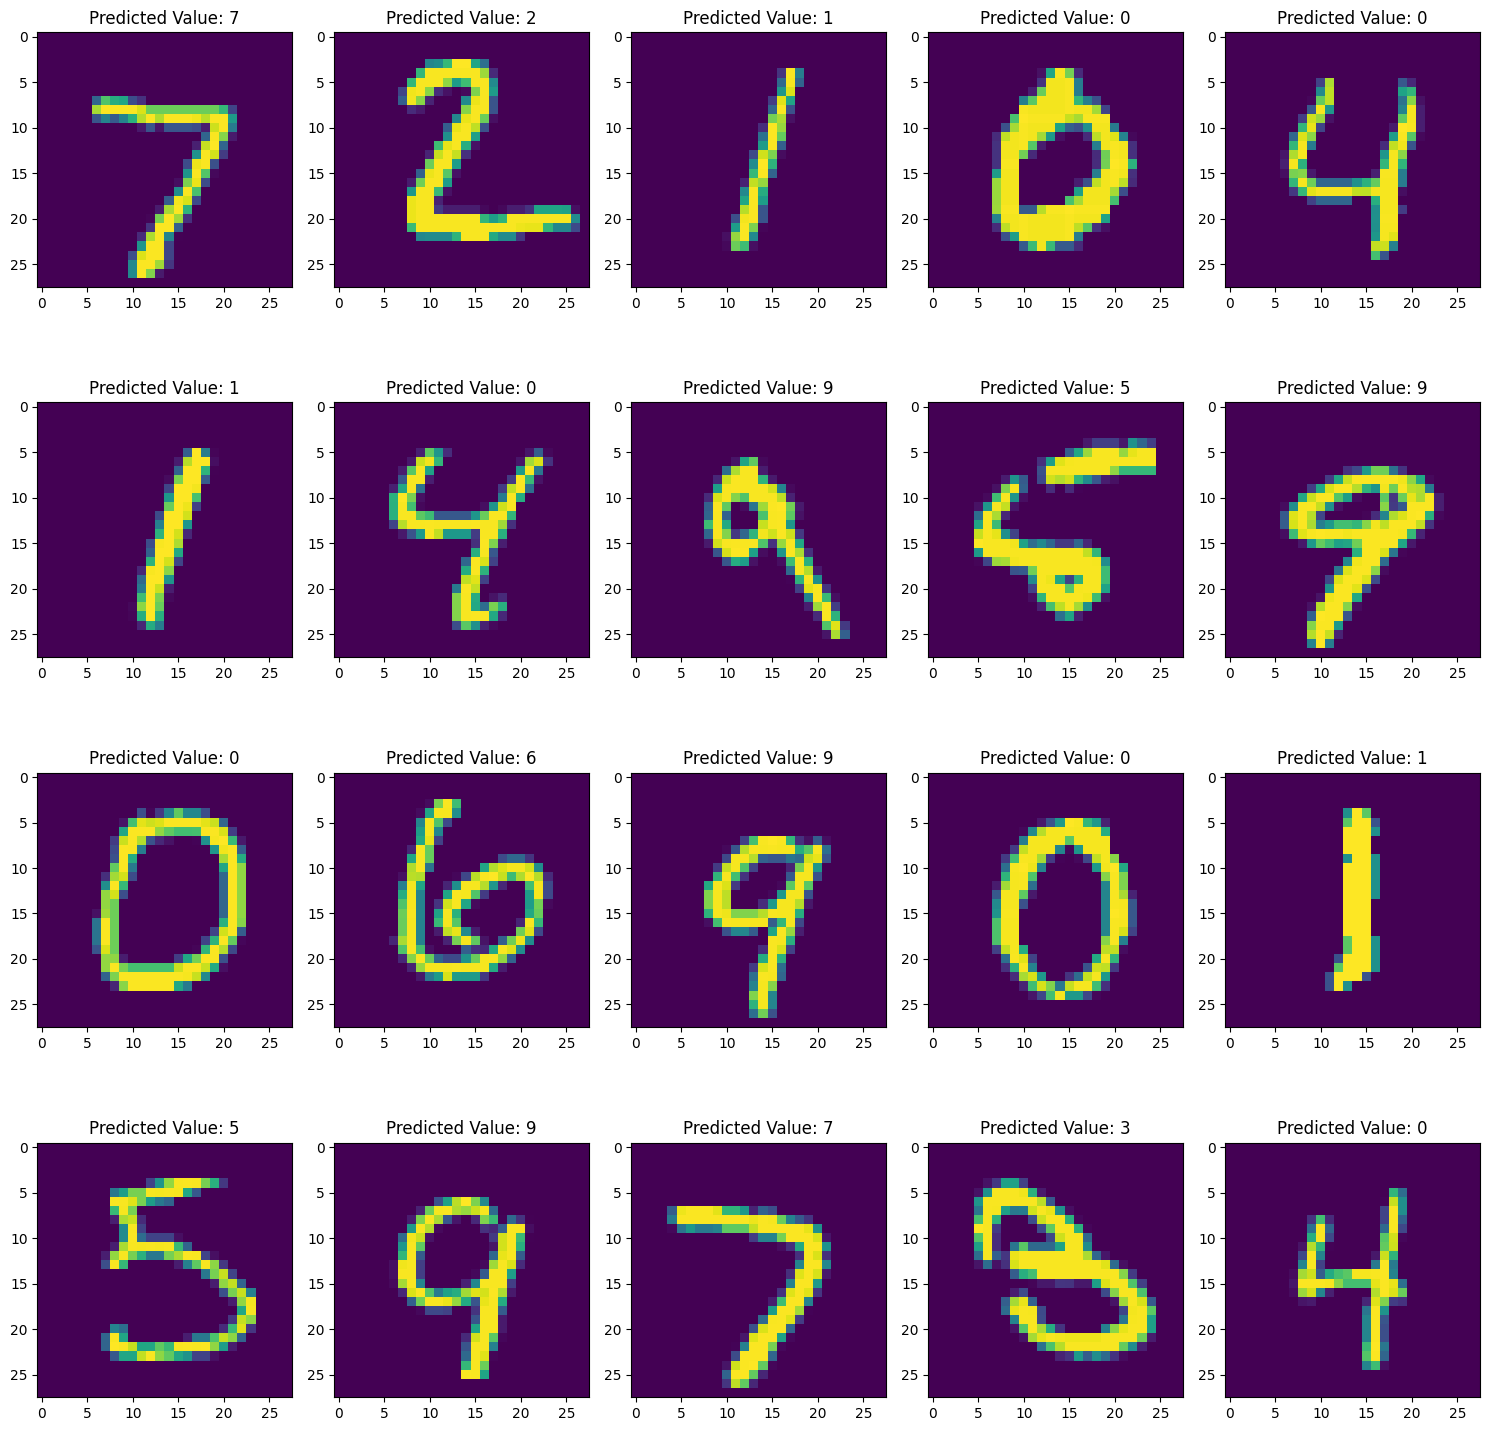

In [49]:
fig, ax = plt.subplots(10,4,figsize=(15,15))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Value: {yhats[i]}')
fig.tight_layout()
plt.show()

Total fails according to this run, and their indecies:

In [50]:
diff = F.one_hot(yhats).float()-ys
diff.argmax(axis=1)
indecies = torch.nonzero(torch.abs(diff))[:,0][::2]
indecies.shape
index_list = indecies.tolist()

In [51]:
len(index_list)

267

# First 40 fails:

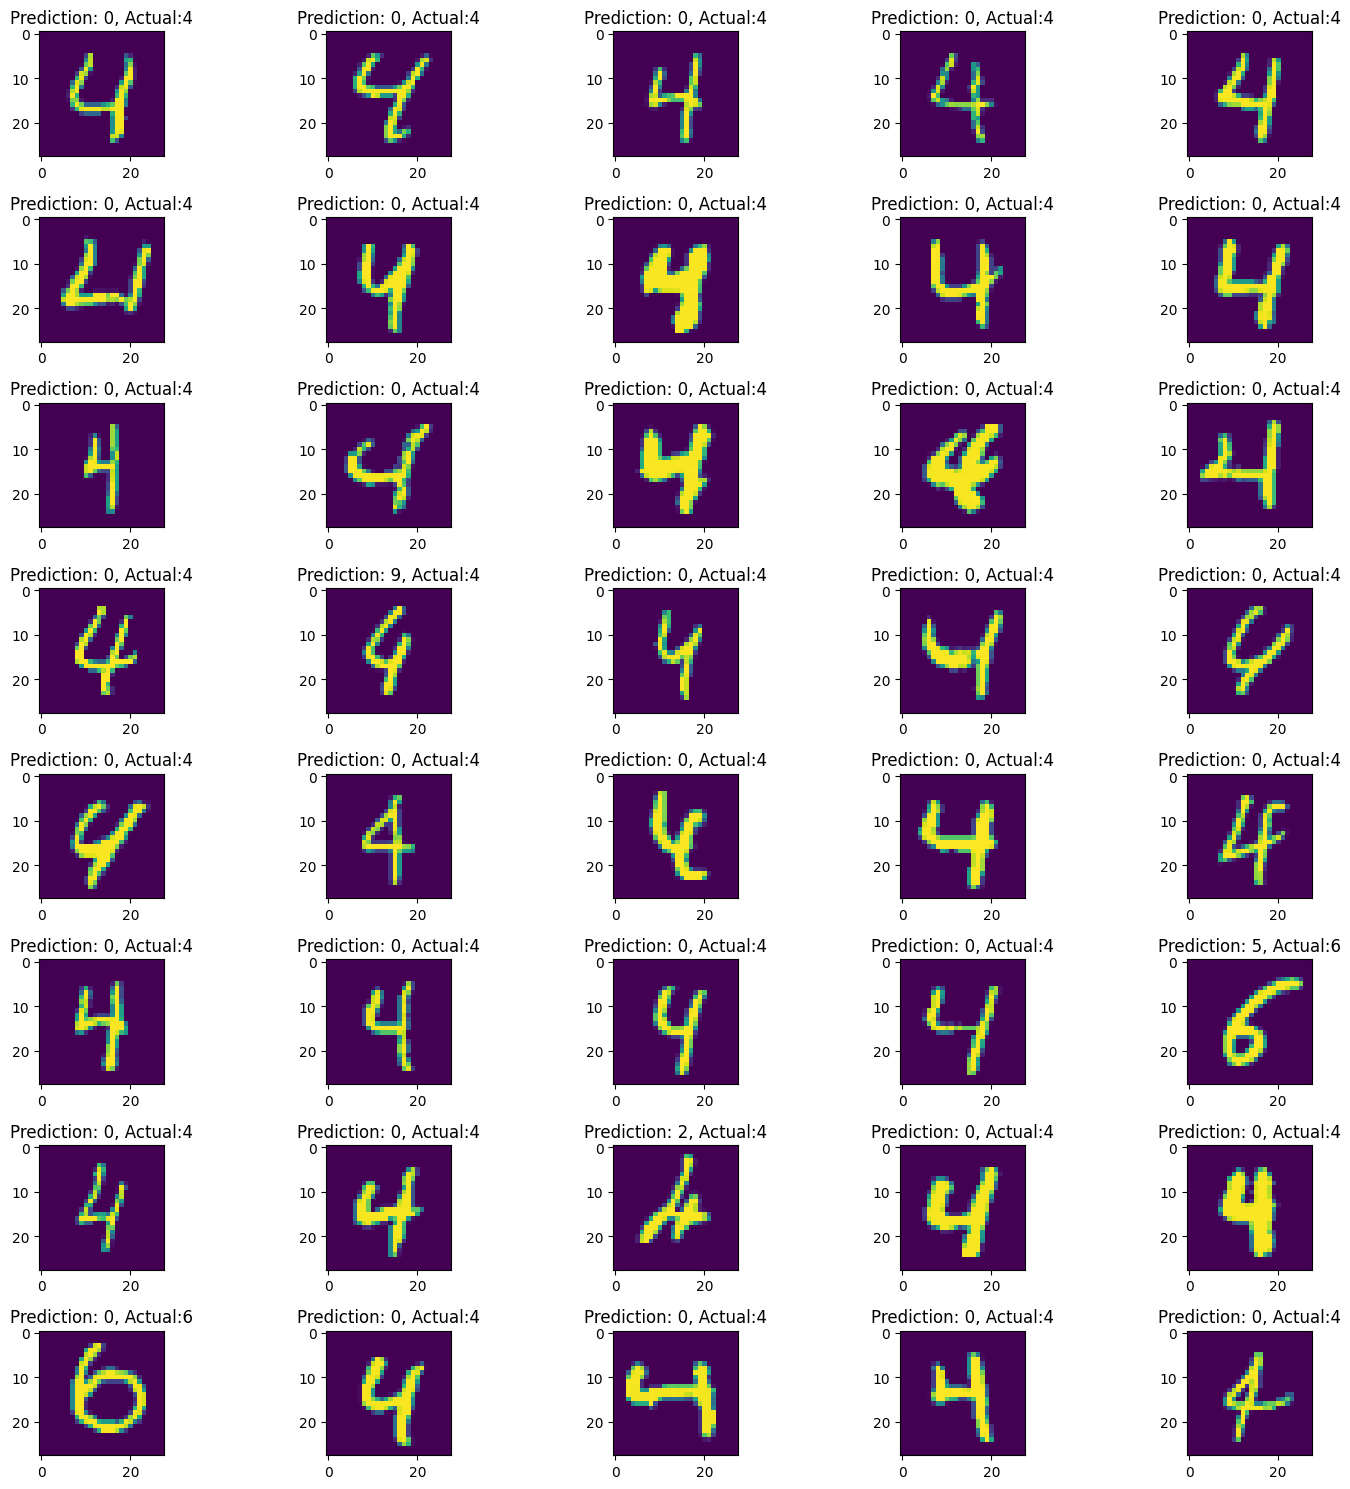

In [52]:
fig, ax = plt.subplots(8,5,figsize=(15,15))
for i, index in enumerate(index_list[:40]):
    plt.subplot(8,5,i+1)
    plt.imshow(xs[index])
    plt.title(f'Prediction: {yhats[index]}, Actual:{torch.nonzero(ys[index])[0][0]}')
fig.tight_layout()
plt.show()